# Libreria `pandas`

* La scelta più indicata per l'analisi dei dati
* Basata su `numpy`
* Compatibile con moltissime altre librerie standard: `matplotlib`, `sklearn`, `seabron`
* Estremamente versatile

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Breve digression: dataset in `seaborn`

Inutile dire che la quantità di dati dis ponibile è pressoché infinita, a volte però ci basta qualcosa per fare delle brevi lezioni o spiegazioni (possibilmente un bel dataset ripulito di tutte le schifezze).

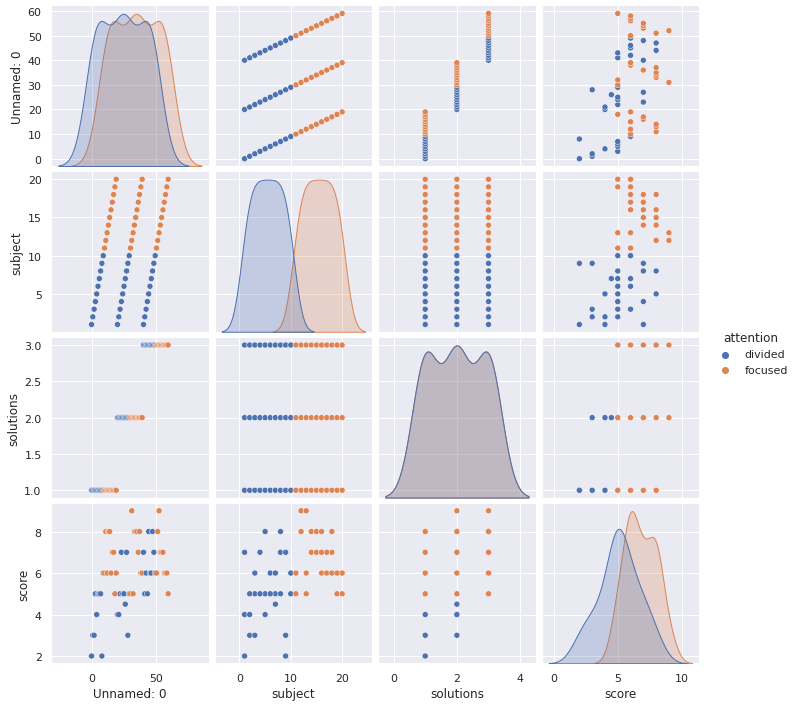

In [3]:
import seaborn as sns
sns.set()
df = sns.load_dataset("attention") # iris è uno dei dataset disponibili, vedi https://github.com/mwaskom/seaborn-data
sns.pairplot(df, hue="attention") # ...

## L'oggetto `Series`
L'oggetto serie rappresenta una **serie statistica**:

* osservazioni e
* **indice**

In [10]:
# Esempio giocattolo
n = 100
indice = np.arange(n)
osservazioni = np.random.randn(n)
# Costruttore 'Series'
ds = pd.Series(data=osservazioni, index=indice)


array([-0.05180082, -0.39729618,  0.6277262 ,  0.80233652, -0.11183947,
        1.26730782, -0.69817014,  0.43762801, -0.9287123 , -0.76456268,
        0.96955958, -0.28830739,  1.16446602,  0.25926971,  0.17953247,
       -0.39291046,  2.43191845,  0.42991283, -1.2147237 , -0.13427102,
        0.00865487, -1.39036209, -0.37143063,  0.28406481, -0.94493775,
       -0.63068994, -2.31307868, -0.08326176, -0.48343924,  2.63958605,
       -1.33189386,  0.11883862, -0.58373484, -0.63427602, -1.30673859,
        1.24564682, -1.61035336,  0.89784016,  0.08693574,  0.85115164,
        1.1081278 , -0.21676385, -1.14637165,  1.120238  , -0.95478767,
        1.37007709,  0.13859474, -0.98428457, -2.33371959,  0.18667572,
        2.03097971, -0.70824943, -0.42719419,  0.65476254,  0.61938537,
       -0.88245173, -0.95514636,  1.23815025,  0.14054321,  0.80976623,
       -1.84499093,  0.23806278,  1.14629787,  1.51859053, -0.50189906,
       -0.29177248, -0.53966136,  0.05452943, -0.69829574,  1.00

In [26]:
# l'indicizzazione delle Series è simile a numpy...
ds[0] # il primo 'valore'
ds[0:10] # le prime 10 coppie indice, valore
# ...consiglio però di usare iloc (vedremo dopo)

0   -0.051801
1   -0.397296
2    0.627726
3    0.802337
4   -0.111839
5    1.267308
6   -0.698170
7    0.437628
8   -0.928712
9   -0.764563
dtype: float64

In [27]:
# Statistica descrittiva
ds.describe()

count    100.000000
mean      -0.031351
std        0.977442
min       -2.333720
25%       -0.700784
50%       -0.021573
75%        0.646517
max        2.639586
dtype: float64

In [28]:
ds.value_counts()

-0.051801    1
 1.518591    1
-0.590029    1
 0.185541    1
-0.823886    1
            ..
-1.331894    1
 2.639586    1
-0.483439    1
-0.083262    1
-0.898028    1
Length: 100, dtype: int64

In [29]:
print(ds.mean())
print(ds.var())
print(ds.std())

-0.03135102642775678
0.9553929480318089
0.977442043310911


## L'oggetto `DataFrame`

Un **DataFrame** è una sequenza di serie statistiche. Ogni serie occupa una "colonna" di una tabella che ha l'indice ad identificare.

In [40]:
# Crezione
df = pd.DataFrame(columns=["A", "B", "C"], index=range(10))

In [62]:
# Riempire un DataFrame
df["A"] = -np.arange(10)
df["B"] = np.random.randn(10)
df["C"] = np.pi

In [63]:
df

,A,B,C
0,0,0.587117,3.141593
1,-1,-0.055941,3.141593
2,-2,-0.783538,3.141593
3,-3,-0.574375,3.141593
4,-4,-0.634160,3.141593
5,-5,-1.596102,3.141593
6,-6,-1.069562,3.141593
7,-7,-1.271174,3.141593
8,-8,-0.517351,3.141593
9,-9,0.119172,3.141593


In [64]:
df["A"][0] # indicizzazione: prima colonna seconda la riga

0

In [67]:
anotherDf = df[["A", "C"]]
print(anotherDf)
print()
# df[0] # Errore
# anotherDf[0] # Errore
print(df.iloc[0:3]["B"])
print()
print(df.at[1, "A"])

   A         C
0  0  3.141593
1 -1  3.141593
2 -2  3.141593
3 -3  3.141593
4 -4  3.141593
5 -5  3.141593
6 -6  3.141593
7 -7  3.141593
8 -8  3.141593
9 -9  3.141593

0    0.587117
1   -0.055941
2   -0.783538
Name: B, dtype: float64

-1


In [68]:
df.to_numpy()

array([[ 0.        ,  0.58711682,  3.14159265],
       [-1.        , -0.05594125,  3.14159265],
       [-2.        , -0.78353751,  3.14159265],
       [-3.        , -0.57437523,  3.14159265],
       [-4.        , -0.63416012,  3.14159265],
       [-5.        , -1.59610195,  3.14159265],
       [-6.        , -1.06956226,  3.14159265],
       [-7.        , -1.27117447,  3.14159265],
       [-8.        , -0.51735074,  3.14159265],
       [-9.        ,  0.11917159,  3.14159265]])

In [70]:
# Statistica descrittiva

df.mean()

# describe
df.describe()

,A,B,C
count,10.00000,10.000000,10.000000
mean,-4.50000,-0.579592,3.141593
std,3.02765,0.660287,0.000000
min,-9.00000,-1.596102,3.141593
25%,-6.75000,-0.998056,3.141593
50%,-4.50000,-0.604268,3.141593
75%,-2.25000,-0.171294,3.141593
max,0.00000,0.587117,3.141593


In [74]:
# L'asse 0 (default) per le colonne, asse 1 per le righe
df.mean(1) # argomento di mean -> asse

0    1.242903
1    0.695217
2    0.119352
3   -0.144261
4   -0.497522
5   -1.151503
6   -1.309323
7   -1.709861
8   -1.791919
9   -1.913079
dtype: float64

In [76]:
df

,A,B,C
0,0,0.587117,3.141593
1,-1,-0.055941,3.141593
2,-2,-0.783538,3.141593
3,-3,-0.574375,3.141593
4,-4,-0.634160,3.141593
5,-5,-1.596102,3.141593
6,-6,-1.069562,3.141593
7,-7,-1.271174,3.141593
8,-8,-0.517351,3.141593
9,-9,0.119172,3.141593


In [82]:
df["D"] = df["B"] + df["C"]
df["E"] = np.exp(df["A"])
df["F"] = np.sin(df["C"])

In [98]:
df = df.drop(["F"], axis=1)

KeyError: ignored

### `DataFrame` come le tabelle di un DB?

In [ ]:
# Merge

In [100]:
df

,A,B,C,D,E
0,0,0.587117,3.141593,3.728709,1.000000
1,-1,-0.055941,3.141593,3.085651,0.367879
2,-2,-0.783538,3.141593,2.358055,0.135335
3,-3,-0.574375,3.141593,2.567217,0.049787
4,-4,-0.634160,3.141593,2.507433,0.018316
5,-5,-1.596102,3.141593,1.545491,0.006738
6,-6,-1.069562,3.141593,2.072030,0.002479
7,-7,-1.271174,3.141593,1.870418,0.000912
8,-8,-0.517351,3.141593,2.624242,0.000335
9,-9,0.119172,3.141593,3.260764,0.000123


In [101]:
df2 = df
df2["A"] = [1,2,3,1,2,3,1,2,2,3]

In [103]:
df2

,A,B,C,D,E
0,1,0.587117,3.141593,3.728709,1.000000
1,2,-0.055941,3.141593,3.085651,0.367879
2,3,-0.783538,3.141593,2.358055,0.135335
3,1,-0.574375,3.141593,2.567217,0.049787
4,2,-0.634160,3.141593,2.507433,0.018316
5,3,-1.596102,3.141593,1.545491,0.006738
6,1,-1.069562,3.141593,2.072030,0.002479
7,2,-1.271174,3.141593,1.870418,0.000912
8,2,-0.517351,3.141593,2.624242,0.000335
9,3,0.119172,3.141593,3.260764,0.000123


In [107]:
# Group by
df2.groupby("A").prod()

,B,C,D,E
A,,,,
1,0.360684,31.006277,19.834320,1.234098e-04
2,0.023330,97.409091,37.976829,2.061154e-09
3,0.149037,31.006277,11.883374,1.125352e-07


In [108]:
df_iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")


In [112]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [113]:
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


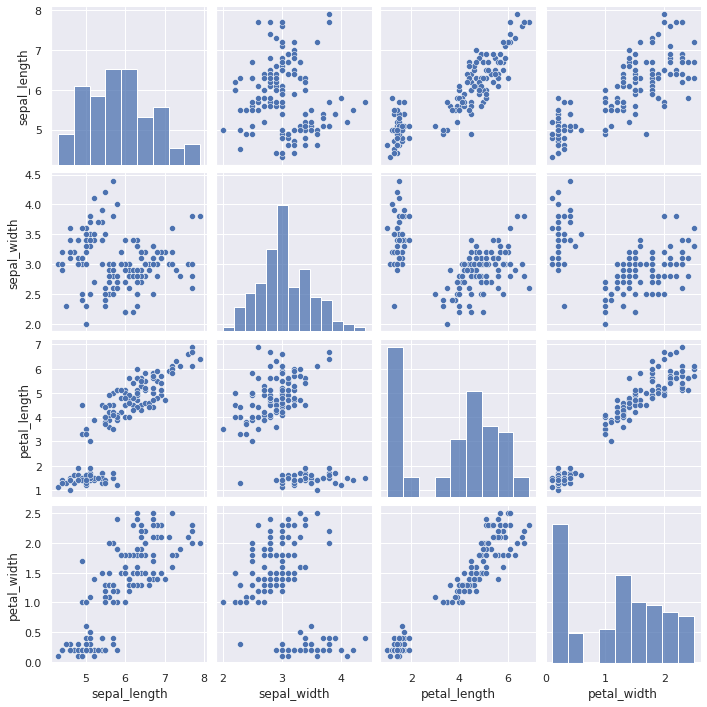

In [115]:
sns.pairplot(df_iris)

**Attenzione** un `DataFrame` non è come un foglio di calcolo:

* ogni colonna di un `DataFrame` più essere di un solo tipo (solo `int`, solo `str`, ...)
* le "celle" di un `DataFrame` non possono contenere formule
* l'indicizzazione alla Excel non è usata (si può comunque simulare utilizzando numeri come indice di riga e stringhe come indice di colonne)

Questo era un assaggino di `pandas` cosa c'è

* Serie temporali (qualcosina lo vedrete nel laboratorio)
* Indici gerarchici
* Pivot table
* Manipolazione stringhe
* I/O in vari formati (csv, JSON, ...)
* ...

## Riferimenti

* [Pandas](https://pandas.pydata.org/)
* [Seaborn](https://seaborn.pydata.org/)
* [Kaggle](https://www.kaggle.com/)